In [2]:
import numpy as np
import pandas as pd

### 1. Object in pandas

- DataFrame: Table
- Series: Column in pandas

![](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)

![](http://t3h.edu.vn/sites/default/files/pictures/thanh-phan-chinh-cua-pandas.png)

### 1. Create Objects

In [5]:
dict_1 = {'name': ['Truong', 'Nam', 'Hoai'], 
          'age': [12, 23, 45],
          'university': ['UK', 'MIT', 'Standford']}
df = pd.DataFrame(dict_1)
df

,name,age,university
0,Truong,12,UK
1,Nam,23,MIT
2,Hoai,45,Standford


In [7]:
series = df.name
#series = df['name']
series

0    Truong
1       Nam
2      Hoai
Name: name, dtype: object

In [8]:
df = pd.DataFrame(np.linspace(1, 20, 20).reshape(5, 4), 
                  index=range(1, 6), 
                  columns=[f'col_{i}' for i in range(1, 5)])
df

,col_1,col_2,col_3,col_4
1,1.0,2.0,3.0,4.0
2,5.0,6.0,7.0,8.0
3,9.0,10.0,11.0,12.0
4,13.0,14.0,15.0,16.0
5,17.0,18.0,19.0,20.0


In [10]:
series = pd.Series(range(1, 6), name='number', dtype='int', 
                   index=[f'index_{i}' for i in range(1, 6)])
series

index_1    1
index_2    2
index_3    3
index_4    4
index_5    5
Name: number, dtype: int32

### 2. Indexing

In [12]:
import seaborn as sns

In [52]:
tip_df = sns.load_dataset('tips') # comma separated values
tip_df.index = [f'index_{i}' for i in range(tip_df.shape[0])]
tip_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
index_3,23.68,3.31,Male,No,Sun,Dinner,2
index_4,24.59,3.61,Female,No,Sun,Dinner,4


**Slicing**
- loc: df.loc[row_label, column_label] --> series.loc[row_label]  --> inclusive
- iloc: df.iloc[row_index, column_index] --> series.iloc[row_index]  --> exclusive

**Cell values**
- at: df.at[row_label, column_label]
- iat: df.iat[row_index, column_index]

In [36]:
tip_df.loc['index_0' : 'index_5' , ['total_bill', 'tip', 'time']]

,total_bill,tip,time
index_0,16.99,1.01,Dinner
index_1,10.34,1.66,Dinner
index_2,21.01,3.50,Dinner
index_3,23.68,3.31,Dinner
index_4,24.59,3.61,Dinner
index_5,25.29,4.71,Dinner


In [35]:
tip_df.iloc[0: 6 , [0, 1, -2]]

,total_bill,tip,time
index_0,16.99,1.01,Dinner
index_1,10.34,1.66,Dinner
index_2,21.01,3.50,Dinner
index_3,23.68,3.31,Dinner
index_4,24.59,3.61,Dinner
index_5,25.29,4.71,Dinner


In [33]:
tip_df.loc['index_0' : 'index_5' , 'total_bill' : 'smoker']

,total_bill,tip,sex,smoker
index_0,16.99,1.01,Female,No
index_1,10.34,1.66,Male,No
index_2,21.01,3.50,Male,No
index_3,23.68,3.31,Male,No
index_4,24.59,3.61,Female,No
index_5,25.29,4.71,Male,No


In [34]:
tip_df.iloc[0 : 6 , 0: 4]

,total_bill,tip,sex,smoker
index_0,16.99,1.01,Female,No
index_1,10.34,1.66,Male,No
index_2,21.01,3.50,Male,No
index_3,23.68,3.31,Male,No
index_4,24.59,3.61,Female,No
index_5,25.29,4.71,Male,No


In [31]:
tip_df.loc['index_0']

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: index_0, dtype: object

In [32]:
tip_df.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: index_0, dtype: object

In [18]:
tip_df[['total_bill']]

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [16]:
tip_df.total_bill.to_frame()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [37]:
tip_df.tail(4)

,total_bill,tip,sex,smoker,day,time,size
index_240,27.18,2.00,Female,Yes,Sat,Dinner,2
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2
index_243,18.78,3.00,Female,No,Thur,Dinner,2


In [38]:
tip_df.at['index_243', 'tip']

3.0

In [40]:
tip_df.iat[-1, 1]

3.0

In [41]:
series = tip_df.total_bill
series.head(5)

index_0    16.99
index_1    10.34
index_2    21.01
index_3    23.68
index_4    24.59
Name: total_bill, dtype: float64

In [44]:
series.loc['index_2' : 'index_4']

index_2    21.01
index_3    23.68
index_4    24.59
Name: total_bill, dtype: float64

In [42]:
series.loc['index_2']

21.01

In [43]:
series.iloc[2]

21.01

### 3. Masking

In [67]:
pd.options.display.max_rows = 6

In [68]:
tip_df

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2
index_243,18.78,3.00,Female,No,Thur,Dinner,2


In [50]:
tip_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3


In [63]:
tip_df.query("sex == 'Male' & smoker == 'No'")
# conditions = (tip_df.sex == 'Male') & (tip_df.smoker == 'No')
# tip_df[conditions]

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
index_3,23.68,3.31,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
index_235,10.07,1.25,Male,No,Sat,Dinner,2
index_239,29.03,5.92,Male,No,Sat,Dinner,3
index_242,17.82,1.75,Male,No,Sat,Dinner,2


In [58]:
# tip_df.query('sex == "Male"')
tip_df[tip_df.sex == 'Male']

,total_bill,tip,sex,smoker,day,time,size
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
index_3,23.68,3.31,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
index_239,29.03,5.92,Male,No,Sat,Dinner,3
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2


In [59]:
pd.concat([tip_df.iloc[:5], tip_df.iloc[-5:]])

,total_bill,tip,sex,smoker,day,time,size
index_0,16.99,1.01,Female,No,Sun,Dinner,2
index_1,10.34,1.66,Male,No,Sun,Dinner,3
index_2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
index_241,22.67,2.00,Male,Yes,Sat,Dinner,2
index_242,17.82,1.75,Male,No,Sat,Dinner,2
index_243,18.78,3.00,Female,No,Thur,Dinner,2


### 4. I/O: Input/ Output

In [73]:
attention_df = pd.read_csv('attention.csv', index_col='Unnamed: 0')
attention_df.head(2)

,subject,attention,solutions,score
0,1,divided,1,2.0
1,2,divided,1,3.0


In [75]:
attention_df.iloc[:30].to_csv('first_30_attention.csv', index=False)

In [76]:
attention_30_df = pd.read_csv('first_30_attention.csv')
attention_30_df.head(2)

,subject,attention,solutions,score
0,1,divided,1,2.0
1,2,divided,1,3.0


In [77]:
attention_30_df.shape

(30, 4)

### 5. Operations 

### 5.1 Group by

![](https://i.stack.imgur.com/sgCn1.jpg)

In [79]:
tip_df.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [81]:
tip_df['total'] = tip_df['total_bill'] + tip_df['tip']
tip_df.head(2)

,total_bill,tip,sex,smoker,day,time,size,total
index_0,16.99,1.01,Female,No,Sun,Dinner,2,18.0
index_1,10.34,1.66,Male,No,Sun,Dinner,3,12.0


In [91]:
tip_df.groupby(['sex', 'smoker'])[['total_bill', 'tip']].mean()

total_bill       tip
sex    smoker                      
Male   Yes      22.284500  3.051167
       No       19.791237  3.113402
Female Yes      17.977879  2.931515
       No       18.105185  2.773519

In [90]:
tip_df.groupby(['sex', 'smoker']).mean()

total_bill       tip      size      total
sex    smoker                                           
Male   Yes      22.284500  3.051167  2.500000  25.335667
       No       19.791237  3.113402  2.711340  22.904639
Female Yes      17.977879  2.931515  2.242424  20.909394
       No       18.105185  2.773519  2.592593  20.878704

In [88]:
tip_df.groupby(['sex', 'smoker']).agg({'total_bill': ['mean', 'max', 'median'], 'tip': ['mean', 'max', 'count']})

total_bill                     tip            
                    mean    max median      mean   max count
sex    smoker                                               
Male   Yes     22.284500  50.81  20.39  3.051167  10.0    60
       No      19.791237  48.33  18.24  3.113402   9.0    97
Female Yes     17.977879  44.30  16.27  2.931515   6.5    33
       No      18.105185  35.83  16.69  2.773519   5.2    54

In [86]:
tip_df.groupby('sex').agg({'total_bill': ['mean', 'max', 'median'], 'tip': ['mean', 'max', 'count']})

total_bill                     tip            
             mean    max median      mean   max count
sex                                                  
Male    20.744076  50.81  18.35  3.089618  10.0   157
Female  18.056897  44.30  16.40  2.833448   6.5    87

In [87]:
tip_df.groupby('sex').agg(mean_total_bill=('total_bill', 'mean'), 
                          max_total_bill=('total_bill', 'median'),
                          mean_tip=('tip', 'mean'))

,mean_total_bill,max_total_bill,mean_tip
sex,,,
Male,20.744076,18.35,3.089618
Female,18.056897,16.40,2.833448


In [82]:
tip_df.groupby('sex').total.mean()

sex
Male      23.833694
Female    20.890345
Name: total, dtype: float64

#### 5.2. Pivot

In [97]:
tip_df.head(2)

,total_bill,tip,sex,smoker,day,time,size,total
index_0,16.99,1.01,Female,No,Sun,Dinner,2,18.0
index_1,10.34,1.66,Male,No,Sun,Dinner,3,12.0


In [98]:
tip_df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [99]:
tip_df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [100]:
tip_df.day.nunique()

4

In [101]:
tip_df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [111]:
tip_df.pivot_table(values='total_bill', index='day', columns='time', aggfunc='sum', fill_value=0)

time,Lunch,Dinner
day,,
Thur,1077.55,18.78
Fri,89.92,235.96
Sat,0.00,1778.40
Sun,0.00,1627.16


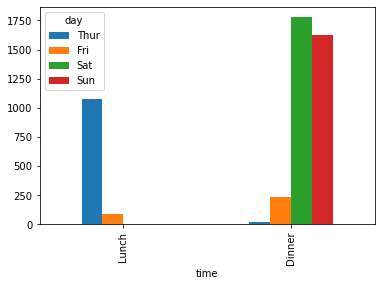

In [112]:
tip_df.pivot_table(values='total_bill', index='time', columns='day', aggfunc='sum', fill_value=0).plot(kind='bar');

#### 5.3. Other operations

In [114]:
tip_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total
index_0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
index_1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
index_2,21.01,3.50,Male,No,Sun,Dinner,3,24.51


In [115]:
tip_df.sort_values('total', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,total
index_170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
index_212,48.33,9.00,Male,No,Sat,Dinner,4,57.33
index_59,48.27,6.73,Male,No,Sat,Dinner,4,55.00
...,...,...,...,...,...,...,...,...
index_111,7.25,1.00,Female,No,Sat,Dinner,1,8.25
index_92,5.75,1.00,Female,Yes,Fri,Dinner,2,6.75
index_67,3.07,1.00,Female,Yes,Sat,Dinner,1,4.07


In [117]:
tip_df.sort_values('total', ascending=False, inplace=True)

In [118]:
tip_df

,total_bill,tip,sex,smoker,day,time,size,total
index_170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
index_212,48.33,9.00,Male,No,Sat,Dinner,4,57.33
index_59,48.27,6.73,Male,No,Sat,Dinner,4,55.00
...,...,...,...,...,...,...,...,...
index_111,7.25,1.00,Female,No,Sat,Dinner,1,8.25
index_92,5.75,1.00,Female,Yes,Fri,Dinner,2,6.75
index_67,3.07,1.00,Female,Yes,Sat,Dinner,1,4.07


### 5.4. Join / Merge

![](https://xuanthulab.net/photo/sql-joins-4213.jpg)

In [131]:
left = tip_df.sort_index().iloc[:10, :2]
right = tip_df.sort_index().iloc[5: 15, 2: 4]

left = left.reset_index()
right = right.reset_index()

In [132]:
pd.options.display.max_rows=20

In [139]:
left.merge(right, on='index', how='inner')

,index,total_bill,tip,sex,smoker
0,index_102,44.30,2.50,Female,Yes
1,index_103,22.42,3.48,Female,Yes
2,index_104,20.92,4.08,Female,No
3,index_105,15.36,1.64,Male,Yes
4,index_106,20.49,4.06,Male,Yes


In [140]:
left.merge(right, on='index', how='outer')

,index,total_bill,tip,sex,smoker
0,index_0,16.99,1.01,NaN,NaN
1,index_1,10.34,1.66,NaN,NaN
2,index_10,10.27,1.71,NaN,NaN
3,index_100,11.35,2.50,NaN,NaN
4,index_101,15.38,3.00,NaN,NaN
5,index_102,44.30,2.50,Female,Yes
6,index_103,22.42,3.48,Female,Yes
7,index_104,20.92,4.08,Female,No
8,index_105,15.36,1.64,Male,Yes
9,index_106,20.49,4.06,Male,Yes


In [141]:
left.merge(right, on='index', how='left')

,index,total_bill,tip,sex,smoker
0,index_0,16.99,1.01,NaN,NaN
1,index_1,10.34,1.66,NaN,NaN
2,index_10,10.27,1.71,NaN,NaN
3,index_100,11.35,2.50,NaN,NaN
4,index_101,15.38,3.00,NaN,NaN
5,index_102,44.30,2.50,Female,Yes
6,index_103,22.42,3.48,Female,Yes
7,index_104,20.92,4.08,Female,No
8,index_105,15.36,1.64,Male,Yes
9,index_106,20.49,4.06,Male,Yes


In [137]:
right

,index,sex,smoker
0,index_102,Female,Yes
1,index_103,Female,Yes
2,index_104,Female,No
3,index_105,Male,Yes
4,index_106,Male,Yes
5,index_107,Male,Yes
6,index_108,Male,No
7,index_109,Female,Yes
8,index_11,Female,No
9,index_110,Male,No


In [142]:
left = tip_df.sort_index().iloc[:10, :2]
right = tip_df.sort_index().iloc[5: 15, 2: 4]

In [144]:
left.merge(right, how='inner', left_index=True, right_index=True)

,total_bill,tip,sex,smoker
index_102,44.30,2.50,Female,Yes
index_103,22.42,3.48,Female,Yes
index_104,20.92,4.08,Female,No
index_105,15.36,1.64,Male,Yes
index_106,20.49,4.06,Male,Yes


In [146]:
pd.read_csv('C:/Users/PC/Downloads/HW_4 (1)/sample_data.csv', nrows=10)

,account_id,ad_id,event_name,timestamp,platform,category_name,region_name,condition_ad_name,price
0,249683985899310273,-159265360436186278,order,2018-05-16 17:33:18.350333,on_behalf,Cars,Đông Bắc Bộ,Mới,267000000
1,2753457128963724056,-6487219347028929285,order,2018-05-04 16:03:08.099983,on_behalf,Cars,Đông Bắc Bộ,Mới,399000000
2,2753457128963724056,-6487219347028929285,order,2018-05-03 15:13:42.447070,on_behalf,Cars,Đông Bắc Bộ,Mới,399000000
3,-4397739266189556976,4054922453976773054,order,2018-05-23 11:15:25.932663,on_behalf,Cars,Hà Nội,Mới,705000000
4,-8143274583979068266,3202538754056800998,order,2018-05-15 17:53:01.634923,on_behalf,Cars,Hà Nội,Mới,696000000
5,6007291878672279226,-1011458500454390912,order,2018-05-03 14:39:53.379256,on_behalf,Cars,Hà Nội,Mới,997000000
6,-8143274583979068266,-5031538607861377271,order,2018-05-02 15:54:24.157315,on_behalf,Cars,Hà Nội,Mới,259000000
7,-7148704049057146074,6927742991209753088,order,2018-05-18 13:05:14.606765,on_behalf,Cars,Hà Nội,Đã sử dụng,538000000
8,8244235460354322809,-1480006483287006729,order,2018-05-04 15:24:31.711427,on_behalf,Cars,Hà Nội,Đã sử dụng,524000000
9,7889304239213447135,-8826716990602725372,order,2018-05-15 17:46:24.973838,on_behalf,Cars,Hà Nội,Đã sử dụng,522000000
